<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [X] Get and plot your feature importances.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [464]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [465]:
train.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 41 columns]

In [0]:
y_train = train['status_group']
X_train_checkout = train.drop(['id'], axis=1)
X_train = train.drop(['status_group', 'id'], axis=1)

# Removing 'id' which is useless.

In [467]:
# Train/test/val split.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.8, test_size=0.2,
    random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

# The shapes are good.

((47520, 39), (11880, 39), (47520,), (11880,))

In [0]:
# List of major cities in the country.

# cities = pd.DataFrame(
# [[-7.773094,	35.699120],
# [-5.030461,	32.819431],
# [-8.909401,	33.460773],
# [-6.161184,	35.745426],
# [-6.830373,	37.670589],
# [-3.680996,	33.427139],
# [-3.386925,	36.682995],
# [-6.433333,	38.900002],
# [-6.802353,	39.279556],
# [-10.676803,	35.655785],
# [-4.893941,	29.673386],
# [-5.047446,	30.161818]], columns=['lat', 'long'])

# def nearest_city(df):
#   closest

In [469]:
import plotly.express as px
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=1)
px.scatter(cities, x='lat', y='long')
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

# Outliers out in the ocean off to the left.

In [310]:
from pandas_profiling import ProfileReport

X_train.profile_report()

In [0]:
# from sklearn.preprocessing import OneHotEncoder

# ce = OneHotEncoder(use_cat_names=True)

# trainlook = train.copy()


# trainlook_encoded = ce.fit_transform(

In [0]:
# import seaborn as sns

# def cat_me(feature):
#   if train[feature].nunique() < 20:
#     sns.catplot(x=feature, y='status_group', data=train, kind='bar')
#   else:
#     pass
# for i in sorted(train.columns):
#   cat_me(i)

In [0]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# categorical_features = train.select_dtypes(exclude='number').columns.tolist()

# for col in categorical_features:
#   if train[col].nunique() < 20:
#     plt.figure(figsize=(16,9))
#     sns.catplot(
#       x=train[col], 
#       y=train['status_group']=='functional', 
#       color='grey'
# );

In [0]:
X_train['district_code'] = X_train['district_code'].astype(str)
X_val['district_code'] = X_val['district_code'].astype(str)

In [474]:
categorical_features

['installer',
 'wpt_name',
 'basin',
 'subvillage',
 'lga',
 'scheme_name',
 'extraction_type',
 'management',
 'payment',
 'payment_type',
 'water_quality',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type',
 'district_code']

In [0]:
import numpy as np

def wrangle(X):
  """
  Function to wrangle all dataframes in the same way.
  1. remove outliers 
    - geospatial bounding box
  """

  # prevent SettingWithCopyWarning
  X = X.copy()

  # Set latitude to 0 if outside the country
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # We can't drop rows with zeroes because that could mess up the submission.
  # So let's just impute the values.
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  # drop columns that are duplicates or missing over 1/3 of their values.
  X = X.drop(columns=['date_recorded','funder', 'region', 'public_meeting', 
                      'scheme_management', 'permit',
                      'extraction_type_group', 'extraction_type_class', 'recorded_by',
                      'quantity_group', 'quality_group', 'source', 'num_private', 
                      'region_code', 'management_group', 'ward'], errors='ignore')
  # Reduce cardinality with an OTHER value
  categorical_features = X.select_dtypes(exclude='number').columns.tolist()
  # categorical_exceptions = ['wpt_name']
  # for col in categorical_exceptions:
  #   top10 = X[col].value_counts()[:-14].index
  #   X.loc[~X[col].isin(top10), col] = 'OTHER'
  for col in categorical_features:
    top10 = X[col].value_counts()[:15].index
    X.loc[~X[col].isin(top10), col] = 'OTHER'
          
  return X

# wrangle_me = [X_train, X_val]

# for i in wrangle_me:
#   i = wrangle(i)
#   print(i.shape)

X_train = wrangle(X_train)
X_val = wrangle(X_val)

In [0]:
numeric_features = X_train.select_dtypes(include='number').columns.tolist()

cardinality = X_train.select_dtypes(exclude='number').nunique()

categorical_features = cardinality.index.tolist()

# categorical_features = [
#  'basin',
# #  'region',
# #  'public_meeting',
# #  'scheme_management',
# #  'permit',
#  'extraction_type',
# #  'extraction_type_group',
# #  'extraction_type_class',
# #  'management',
# #  'payment',
#  'payment_type',
#  'water_quality',
# #  'quality_group',
#  'quantity',
# #  'source',
#  'source_type',
#  'source_class',
#  'waterpoint_type',
#  'waterpoint_type_group'
#  ]



In [0]:
features = categorical_features + numeric_features

In [478]:
categorical_features

['installer',
 'wpt_name',
 'basin',
 'subvillage',
 'district_code',
 'lga',
 'scheme_name',
 'extraction_type',
 'management',
 'payment',
 'payment_type',
 'water_quality',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [479]:
X_train.head()

amount_tsh  gps_height  ...     waterpoint_type  waterpoint_type_group
3607         50.0        2092  ...  communal standpipe     communal standpipe
50870         0.0           0  ...           hand pump              hand pump
20413         0.0           0  ...               other                  other
52806         0.0           0  ...  communal standpipe     communal standpipe
50091       300.0        1023  ...               other                  other

[5 rows x 23 columns]

In [480]:

checkout = X_train_checkout.groupby('payment_type')['status_group'].value_counts(normalize=True)
checkout
# sns.catplot(x='payment_type', y='

payment_type  status_group           
annually      functional                 0.752334
              non functional             0.179846
              functional needs repair    0.067820
monthly       functional                 0.660482
              non functional             0.227831
              functional needs repair    0.111687
never pay     non functional             0.475856
              functional                 0.448911
              functional needs repair    0.075233
on failure    functional                 0.620593
              non functional             0.308636
              functional needs repair    0.070772
other         functional                 0.579696
              non functional             0.308349
              functional needs repair    0.111954
per bucket    functional                 0.677796
              non functional             0.276683
              functional needs repair    0.045520
unknown       non functional             0.514527
            

In [0]:
def mean_encoder(X):
  pass

In [0]:
# X_train.scheme_name.value_counts()

In [483]:
X_train.wpt_name.value_counts()

OTHER              40478
none                2858
Shuleni             1360
Zahanati             650
Msikitini            426
Kanisani             260
Sokoni               212
Ofisini              212
Bombani              208
School               169
Shule Ya Msingi      164
Sekondari            124
Shule                120
Muungano             104
Mkombozi              92
Madukani              83
Name: wpt_name, dtype: int64

In [484]:
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year']

In [0]:
X_train = X_train[features]
X_val = X_val[features]
test = test[features]

In [486]:
X_train.columns

Index(['installer', 'wpt_name', 'basin', 'subvillage', 'district_code', 'lga',
       'scheme_name', 'extraction_type', 'management', 'payment',
       'payment_type', 'water_quality', 'quantity', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year'],
      dtype='object')

In [487]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  # TargetEncoder(handle_unknown='value'), # This doesn't work.
  SimpleImputer(verbose=1, strategy='median'),
  StandardScaler(),
  RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=23,
                         max_features=0.4)
  # GradientBoostingClassifier(n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)

print("Validation Accuracy", pipeline.score(X_val, y_val))

y_pred = pipeline.predict(test)

Validation Accuracy 0.8075757575757576


In [488]:
'''
Passes and results:
LogisticRegressionCV
1. Removed a few duplicate features
  - 73.3% accuracy
2. Removed more features
  - 0.7314814814814815

DecisionTreeClassifier
3. Changed model type
  - 0.7622895622895622
4. Fix the wrangler so it actually modifies the dataframes
  - 0.7509259259259259
  - Removing those features lowered our score.
5. Add cardinality reduction to the wrangler
  - 0.7484848484848485
  - And the score drops again.
6. Set max_depth
  - 15 -> 0.7636363636363637
  - 16 -> 0.7659090909090909
  - 17 -> 0.7648989898989899
  - 18 -> 0.7668350168350169
7. max_depth=18, removed 'recorded_by'
  - 0.7682659932659933
8. Imputer strategy=median
  - 0.7698653198653199
9. Remove extraction type group
  - 0.7716329966329967
10. Remove a lot of features, add back wpt_name
  - 0.7686868686868686
11. Take top 15 instead of 10
  - 0.772979797979798

RandomForestClassifier
12. changed model
  - 0.8008417508417508
  - 0.78715 on leaderboard. That indicates overfitting.
13. Take top 15 instead of 10
  - 0.7973905723905724
  - 0.78144 on Leaderboard. Not an improvement. Changed back to 15.
15. Removed 'ward', 'date-recorded', 'funder'.
  - 0.7975589225589226
  - 0.79147 on Leaderboard. Better! and possibly less overfitting than before.
16. Changed 'district_code' to string because it's categorical.
  - 0.8045454545454546
17. Re-introduced contruction year because I'd excluded it early on for no real reason.
  - 0.80150 on the leaderboard.

GradientBoostingClassifier
14. changed model
  - 0.7528619528619529
'''

"\nPasses and results:\nLogisticRegressionCV\n1. Removed a few duplicate features\n  - 73.3% accuracy\n2. Removed more features\n  - 0.7314814814814815\n\nDecisionTreeClassifier\n3. Changed model type\n  - 0.7622895622895622\n4. Fix the wrangler so it actually modifies the dataframes\n  - 0.7509259259259259\n  - Removing those features lowered our score.\n5. Add cardinality reduction to the wrangler\n  - 0.7484848484848485\n  - And the score drops again.\n6. Set max_depth\n  - 15 -> 0.7636363636363637\n  - 16 -> 0.7659090909090909\n  - 17 -> 0.7648989898989899\n  - 18 -> 0.7668350168350169\n7. max_depth=18, removed 'recorded_by'\n  - 0.7682659932659933\n8. Imputer strategy=median\n  - 0.7698653198653199\n9. Remove extraction type group\n  - 0.7716329966329967\n10. Remove a lot of features, add back wpt_name\n  - 0.7686868686868686\n11. Take top 15 instead of 10\n  - 0.772979797979798\n\nRandomForestClassifier\n12. changed model\n  - 0.8008417508417508\n  - 0.78715 on leaderboard. That 

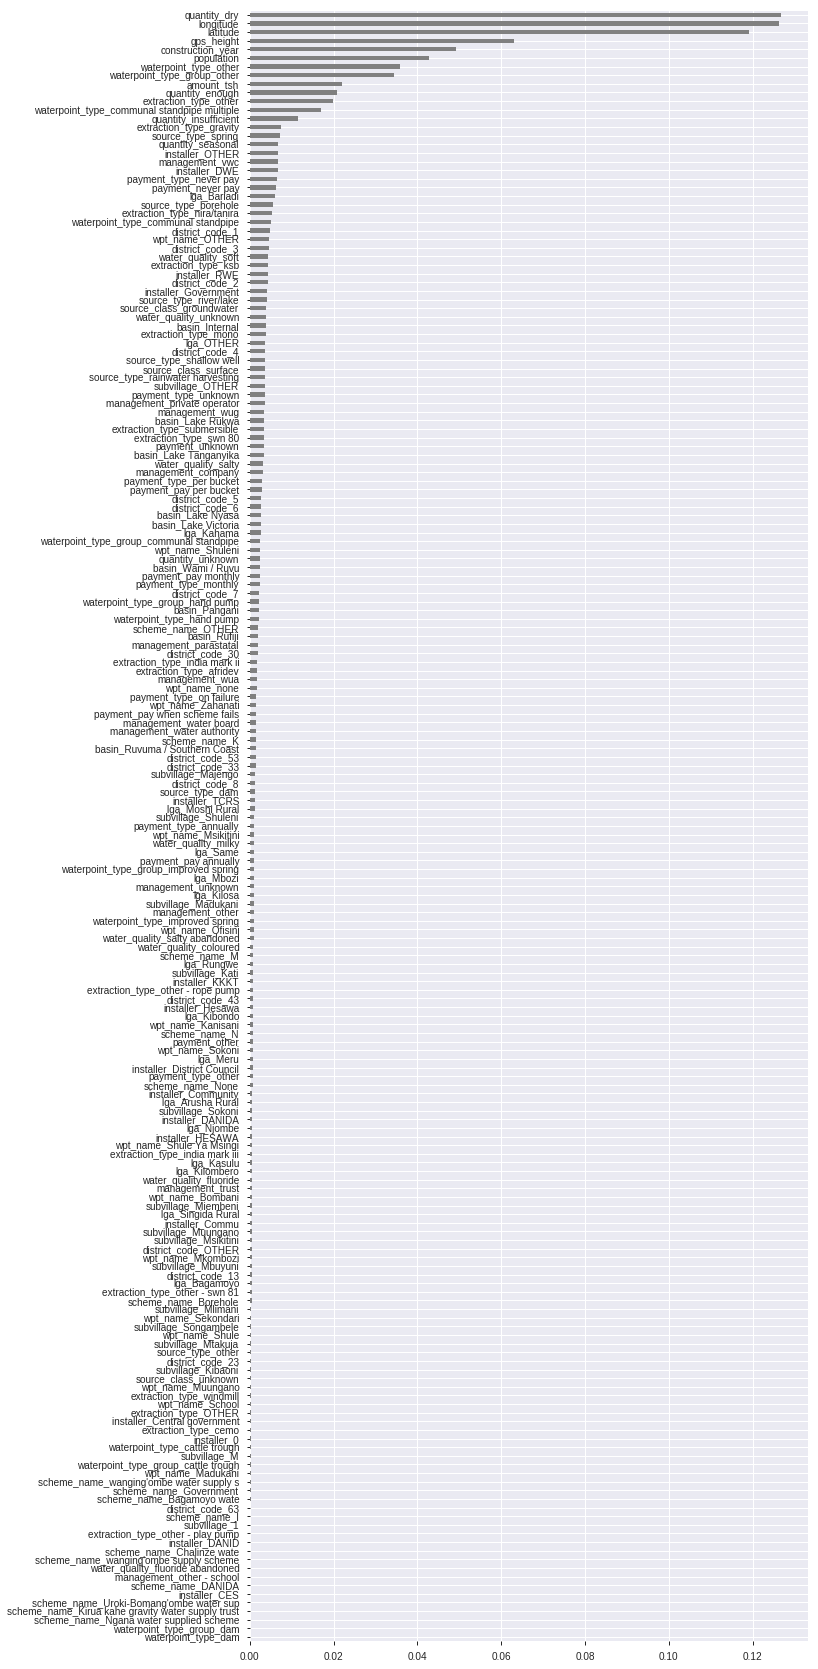

In [489]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns 
coefficients = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

In [0]:
import datetime
time = datetime.datetime.now()
# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Coop-submission'+str(time)+'.csv', index=False)

In [452]:
pd.Series(y_pred).value_counts()

functional                 9024
non functional             4964
functional needs repair     370
dtype: int64

In [453]:
y_val.head()

2980     non functional
5246         functional
22659        functional
39888    non functional
13361        functional
Name: status_group, dtype: object

In [454]:
trues = pd.Series(y_val)
trues.head()

2980     non functional
5246         functional
22659        functional
39888    non functional
13361        functional
Name: status_group, dtype: object

In [0]:
val_pred = pd.Series(pipeline.predict(X_val))

In [456]:
val_pred.shape

(11880,)

In [457]:
X_val.shape

(11880, 21)

In [458]:
val_pred.head(10)

0    non functional
1        functional
2        functional
3        functional
4        functional
5    non functional
6        functional
7    non functional
8    non functional
9    non functional
dtype: object

In [459]:
y_val.head(10)

2980     non functional
5246         functional
22659        functional
39888    non functional
13361        functional
5517     non functional
49246    non functional
23338    non functional
54           functional
22989        functional
Name: status_group, dtype: object

In [460]:


errorcheck = X_val.copy()
errorcheck['status_group'] = y_val
# errorcheck.reset_index
errorcheck['predicted'] = val_pred

errorcheck.head(10)

installer   wpt_name  ...    status_group       predicted
2980        DWE      OTHER  ...  non functional  non functional
5246      OTHER      OTHER  ...      functional      functional
22659       DWE      OTHER  ...      functional             NaN
39888      KKKT      OTHER  ...  non functional             NaN
13361     OTHER      OTHER  ...      functional             NaN
5517      OTHER  Msikitini  ...  non functional      functional
49246     OTHER      OTHER  ...  non functional             NaN
23338     DANID       none  ...  non functional             NaN
54        OTHER      OTHER  ...      functional      functional
22989       DWE       none  ...      functional             NaN

[10 rows x 23 columns]

In [0]:
errorcheck['error'] = errorcheck['status_group'].equals(errorcheck['predicted'])

In [0]:
# val_pred.shape, X_val.shape, y_val.shape

In [0]:
# errorcheck.shape